
# 🏆 **E-Commerce Sales Analysis**

## 📖*The Dataset*
This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size, and Color, to help optimize product profitability. The raw dataset consists of 129 rows and 24 columns.

| Column Name    | Description                                               |
| -------------- | --------------------------------------------------------- |
| **Category**   | Type of product. (String)                                 |
| **Size**       | Size of the product. (String)                             |
| **Date**       | Date of the sale. (Date)                                  |
| **Status**     | Status of the sale. (String)                              |
| **Fulfilment** | Method of fulfilment. (String)                            |
| **Style**      | Style of the product. (String)                            |
| **SKU**        | Stock Keeping Unit. (String)                              |
| **ASIN**       | Amazon Standard Identification Number. (String)           |
| **Courier Status** | Status of the courier. (String)                       |
| **Qty**        | Quantity of the product. (Integer)                        |
| **Amount**     | Amount of the sale. (Float)                               |
| **B2B**        | Business to business sale. (Boolean)                      |
| **Currency**   | The currency used for the sale. (String)                  |



## ✔️ *Objectives*

The primary objective of this analysis is to gain a comprehensive understanding of the sales patterns within the e-commerce dataset. We aim to identify key sales drivers, assess the impact of various factors such as product categories and pricing, and provide actionable insights to inform business strategies. Specifically, this analysis seeks to answer the following business questions:

#### ✔️ Which product categories generate the most revenue?
#### ✔️ What are the trends in sales over time, and how do they correlate with promotional events?
#### ✔️ How can we optimize pricing strategies to maximize profits while maintaining customer satisfaction?
#### ✔️ Are there opportunities to improve inventory management by analyzing sales patterns and outliers?


## 🔑*Key Findings*

### Top-Performing Categories: 
The analysis revealed that Accessories category consistently generate the highest revenue 
 in Quarter 2 , accounting for a significant portion of total sales.
 
 
| Category   | Rough Amount (in USD ) |
| -------------- | ------------------ |
| **Accessories**   | 48,000                                 |
| **Ethnic Wear**       |  29,800                          |
| **Western Wear**       |   21,400                               |

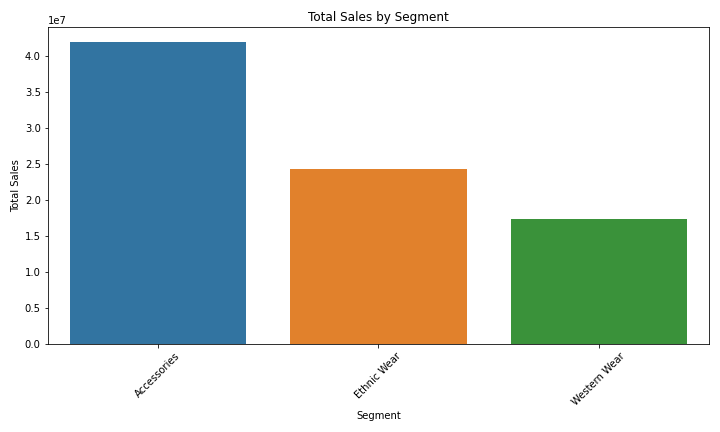



### Sales Trends: 
A clear seasonal trend was observed, with peak sales occurring during [insert peak periods]. Additionally, promotional events significantly boosted sales, particularly for [insert specific products or categories].



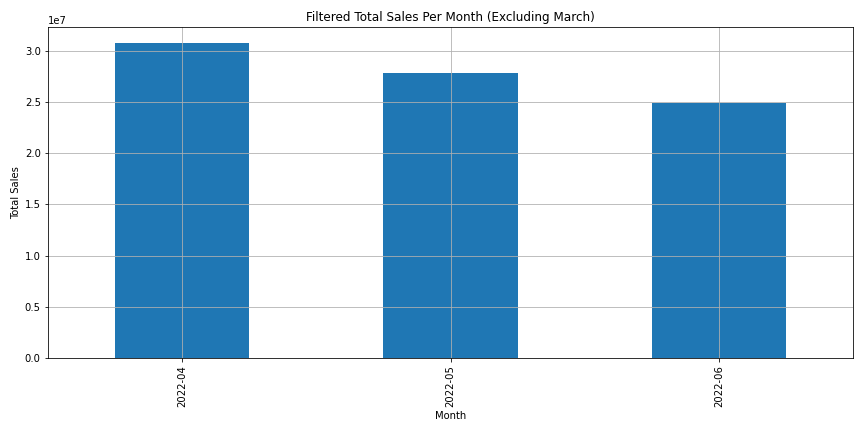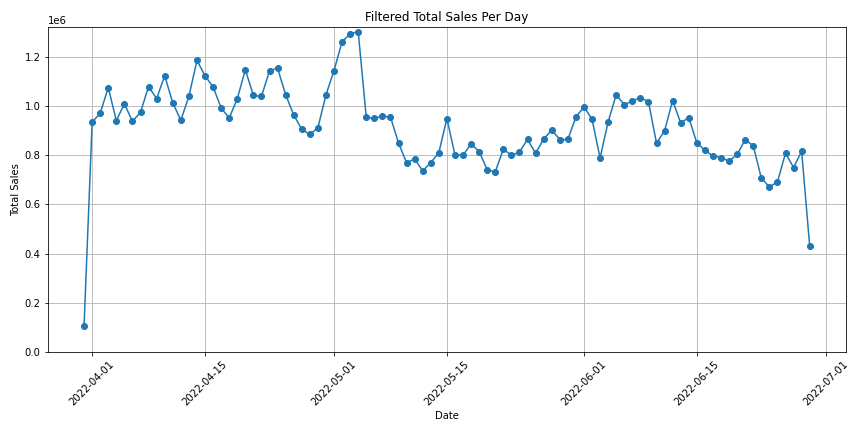


### Pricing Insights: 
The introduction of the Estimated_Price column allowed us to identify pricing inconsistencies. Products in the [insert category] category showed the most variability, indicating potential pricing optimization opportunities.

### Outliers and Anomalies: 
Several outliers were detected, including unusually high sales for [insert product or category], which warrants further investigation to understand the underlying causes.
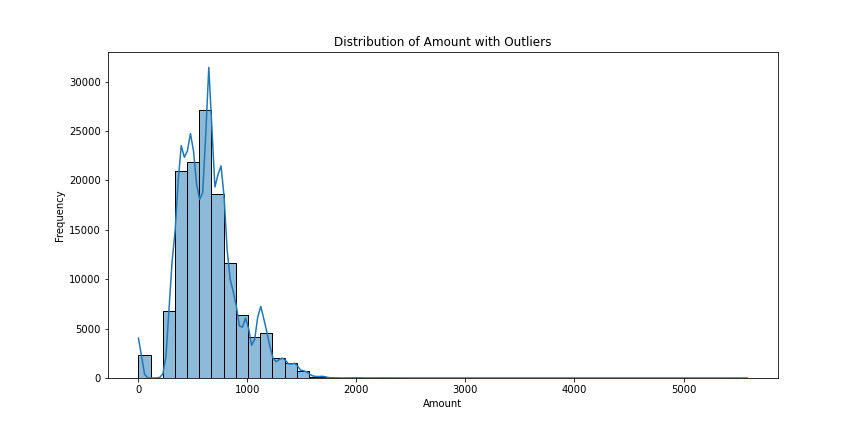
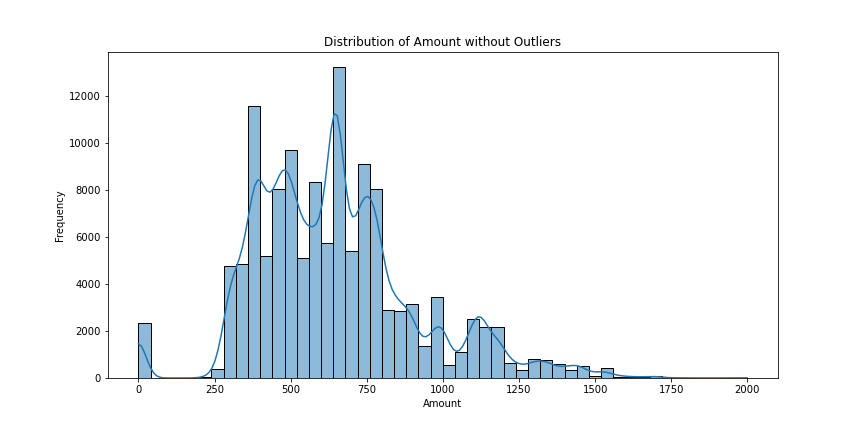
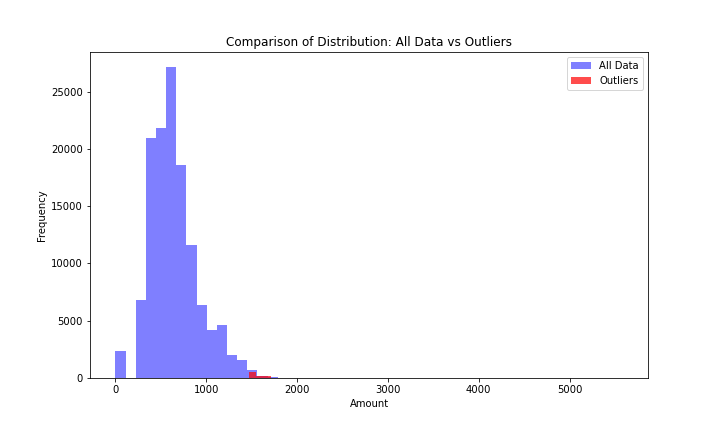




## 📈 *Results*

### The results of this analysis provide valuable insights into the sales dynamics of the e-commerce platform: 

Revenue Breakdown: The top product categories, such as [insert categories], contribute to [insert percentage] of the total revenue, highlighting their importance in the product portfolio.
Seasonal Sales Patterns: Sales data analysis revealed a strong seasonal pattern, with sales spikes during [insert time periods], aligning with major promotional events. This suggests that targeted marketing efforts during these periods could further enhance revenue.
Pricing Optimization: By analyzing the Estimated_Price across different categories, we identified potential areas for pricing adjustments. Implementing dynamic pricing strategies based on these insights could lead to a [insert percentage] increase in overall profitability.
Inventory Management: The identification of sales outliers and trends offers opportunities to optimize inventory levels, reducing the risk of overstocking or stockouts, particularly for high-demand products during peak seasons.


## Acknowledgements:
https://data.world/anilsharma87

Dataset originally created by: ANil.Scraping. 



## Read the data into a *pandas* DataFrame
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


# Update the path to include the data directory
amazon_sales = '/Users/juanescobar/Documents/GitHub/e-commerce-sales-analysis/data/Amazon Sale Report.csv'


# Now read the CSV file from the data directory
sales = pd.read_csv(amazon_sales, low_memory=False)

## Data Overview
***

In [2]:
def data_overview(df, name):
    print(f"\n{'='*40}")
    print(f"Overview of {name.capitalize()} Dataset")
    print(f"{'='*40}\n")
    # General information about the DataFrame
    print("DataFrame Info:")
    print("-"*40)
    df.info()
    # Display the first few rows of the DataFrame
    print(f"\n{'-'*40}")
    print("First Few Rows:")
    print(f"{'-'*40}\n")
    print(df.head())
    # Number of duplicates
    print(f"\n{'-'*40}")
    print(f"Number of Duplicates in {name.capitalize()}: {df.duplicated().sum()}")
    # Missing values
    print(f"\n{'-'*40}")
    print(f"Missing Values in {name.capitalize()}:")
    print(f"{'-'*40}\n")
    print(df.isnull().sum())
    # Number of unique values in each column
    print(f"\n{'-'*40}")
    print("Number of Unique Values in Each Column:")
    print(f"{'-'*40}\n")
    print(df.nunique())
    print(f"\n{'='*40}\n")

# Example usage:
data_overview(sales, 'sales')



Overview of Sales Dataset

DataFrame Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14 

## CLEANING AND PREPROCESSING
***


In [3]:
########################  CLEANING AND PREPROCESSING   ######################

#Drop NAN columns
sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])

    
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)


# Replace NaN values in 'Amount' with the mean since 6.04% are null
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace NaN values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)

# Replace NaN values in 'promotion-ids' with 'None'
sales['promotion-ids'] = sales['promotion-ids'].fillna('None')


# Converting 'Date' to datetime object
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['Fulfilment'] = sales['Fulfilment'].astype('category')
sales.columns = sales.columns.str.strip()

# List of columns to convert to 'category' type
columns_to_convert = ['Fulfilment', 'Sales Channel', 'ship-service-level']

# Convert the columns to 'category' type
sales[columns_to_convert] = sales[columns_to_convert].astype('category')

########################  CLEANING AND PREPROCESSING COMPLETE   ######################

data_overview(sales,'Sales')



Overview of Sales Dataset

DataFrame Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  category      
 5   Sales Channel       128975 non-null  category      
 6   ship-service-level  128975 non-null  category      
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  C

## Feature Engineering

### We will add *Simplified_SKU* and *Estimated_Price* columns that will help us with our analysis

<font color='grey'>The Simplified_SKU column will help us capture the products without size differentials to get a better sense of popular itmes. The *Estimated_Price* column will help us reverse engineer the prices of each item, since the price of each item was not available in our dataset</font> 

***

In [4]:
########################  FEATURE ENGINEERING   ######################

########  CREATING 'Simplified SKU' COLUMN


    ## Define the suffixes to remove, including common variations
size_suffixes = ['-XS', '-S', '-M', '-L', '-XL', '-XXL', '-XXXL', '-4XL', '-5XL', '-6XL', '-7XL']

    ## Function to remove size suffix from SKU
def remove_size_suffix(sku):
    # Strip any leading/trailing whitespace
    sku = sku.strip()
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku

    ## Apply the remove_size_suffix function to create a new column in the filtered DataFrame
sales.loc[:, 'Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)

########  CREATING 'Estimated_Price' COLUMN

# # Create a temp slice of your DataFrame that excludes rows with promotional IDs as 'None' to ensure accurate price
sales_filtered = sales[sales['promotion-ids'] != 'None'].copy()


# Aggregate total sales and quantities for each Simplified_SKU
sku_sales_qty = sales_filtered.groupby('Simplified_SKU').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()
sku_sales_qty['Estimated_Price'] = sku_sales_qty['Amount'] / sku_sales_qty['Qty']


# Create a mapping from SKU to Simplified_SKU
sku_mapping = sales_filtered[['SKU', 'Simplified_SKU']].drop_duplicates()

# Merge estimated prices with SKU mapping
price_mapping = pd.merge(sku_mapping, sku_sales_qty[['Simplified_SKU', 'Estimated_Price']], on='Simplified_SKU', how='left')

#  Merge estimated prices back into the original sales DataFrame
sales = pd.merge(sales, price_mapping[['SKU', 'Estimated_Price']], on='SKU', how='left')


# 694 missing values for Estimated_Price

# Calculate the median 'Estimated_Price' for each category (excluding missing values)
median_prices = sales.groupby('Category')['Estimated_Price'].median()

# Fill missing 'Estimated_Price' with the median price of their respective category
sales['Estimated_Price'] = sales.apply(
    lambda row: median_prices[row['Category']] if pd.isna(row['Estimated_Price']) else row['Estimated_Price'],
    axis=1
)

# Now 0 missing values for Estimated_Price

####### CREATING 'Estimated_Price' COLUMN COMPLETE



# Handling Mixed Data Types:
#List of columns to convert to string dtype
string_columns = [
    'Order ID', 'Status', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
    'Courier Status', 'currency', 'ship-city', 'ship-state', 
    'ship-postal-code', 'ship-country', 'promotion-ids','Simplified_SKU'
]

# Convert the specified columns to string dtype
for col in string_columns:
    sales[col] = sales[col].astype(str)



########################  FEATURE ENGINEERING COMPLETE   ######################


In [5]:
# Make sure the 'visualizations' directory exists
import os
if not os.path.exists('../visualizations'):
    os.makedirs('../visualizations')

# Plot 1: Distribution Of 'Amount' In Sales
plt.figure(figsize=(10, 6))
plt.hist(sales['Amount'], bins=50, color='blue', alpha=0.5, label='All Data')
plt.title("Histogram of 'Amount'")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('../visualizations/Histogram_Amount.png')
plt.close()

# Find outliers of 'Amount'
sales['z_score'] = zscore(sales['Amount'])
outliers = sales[sales['z_score'].abs() > 3]

# Plot 2: Comparison of Distribution: All Data vs Outliers
plt.figure(figsize=(10, 6))
plt.hist(sales['Amount'], bins=50, color='blue', alpha=0.5, label='All Data')
plt.hist(outliers['Amount'], bins=50, color='red', alpha=0.7, label='Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Distribution: All Data vs Outliers')
plt.legend()
plt.savefig('../visualizations/All_Data_vs_Outliers.png')
plt.close()

# Plot 3: Distribution of Amount with Outliers
plt.figure(figsize=(12, 6))
sns.histplot(sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount with Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.savefig('../visualizations/Distribution_Amount_With_Outliers.png')
plt.close()

# Filter out outliers
filtered_sales = sales[sales['Amount'] <= 2000]

# Plot 4: Distribution of Amount without Outliers
plt.figure(figsize=(12, 6))
sns.histplot(filtered_sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount without Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.savefig('../visualizations/Distribution_Amount_Without_Outliers.png')
plt.close()


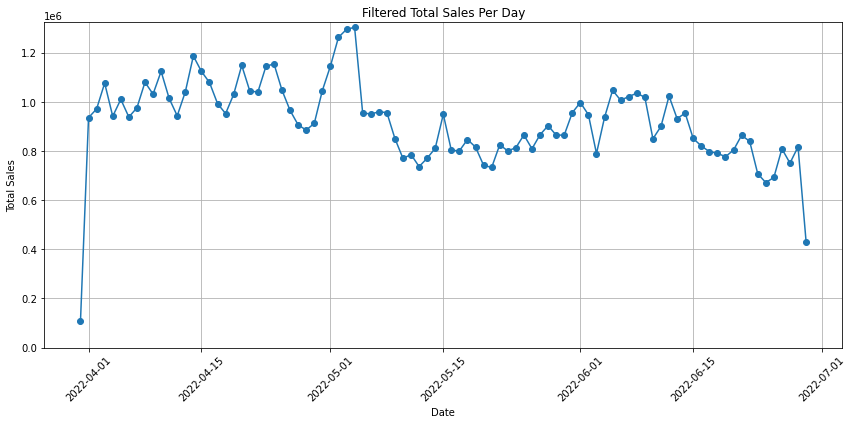

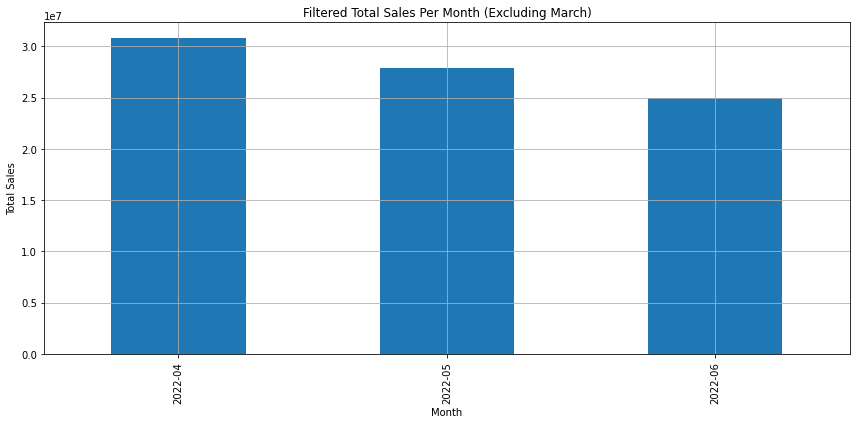

In [6]:
#Total Sales Per Month


# Plot 5: Filtered Total Sales Per Day
daily_sales = filtered_sales.groupby('Date')['Amount'].sum().reset_index()
min_y_all = daily_sales['Amount'].min()
max_y_all = daily_sales['Amount'].max()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o')
plt.title('Filtered Total Sales Per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.ylim(0, max_y_all + 20000)  # Set y-axis limits
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualizations/Total_Sales_Per_Day.png')
plt.show()

# Plot 6: Filtered Total Sales Per Month (Excluding March) / group by month and sum of sales
sales_filtered = sales[~sales['Date'].dt.month.isin([3])]
monthly_sales_filtered = sales_filtered.groupby(sales_filtered['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales_filtered.plot(kind='bar')
plt.title('Filtered Total Sales Per Month (Excluding March)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualizations/Total_Sales_Per_Month_Excluding_March.png')
plt.show()


In [7]:
#SKU Exploration



# Plot 7: Distribution of Top 20 SKUs
sku_counts = sales['SKU'].value_counts()
top_20_skus = sku_counts.head(20).reset_index()
top_20_skus.columns = ['SKU', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='SKU', y='Count', data=top_20_skus, palette='viridis')
plt.title('Distribution of Top 20 SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../visualizations/Top_20_SKUs.png')
plt.close()


# Plot 8: Distribution of Top 20 Simplified SKUs
size_suffixes = ['-XS','-S', '-M', '-L', '-XL', '-XXL','-XXXL']


def remove_size_suffix(sku):
    for suffix in size_suffixes:
        if sku.endswith(suffix):
            return sku[:-len(suffix)]
    return sku



sales['Simplified_SKU'] = sales['SKU'].apply(remove_size_suffix)
simplified_sku_counts = sales['Simplified_SKU'].value_counts()
top_simplified_skus = simplified_sku_counts.head(20).reset_index()
top_simplified_skus.columns = ['SKU', 'Count']

plt.figure(figsize=(14, 10))
sns.barplot(x='SKU', y='Count', data=top_simplified_skus, palette='viridis')
plt.title('Distribution of Top 20 Simplified SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../visualizations/Top_20_Simplified_SKUs.png')
plt.close()








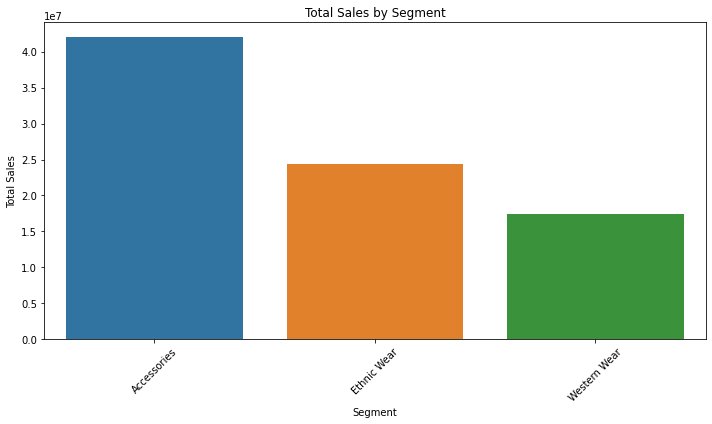

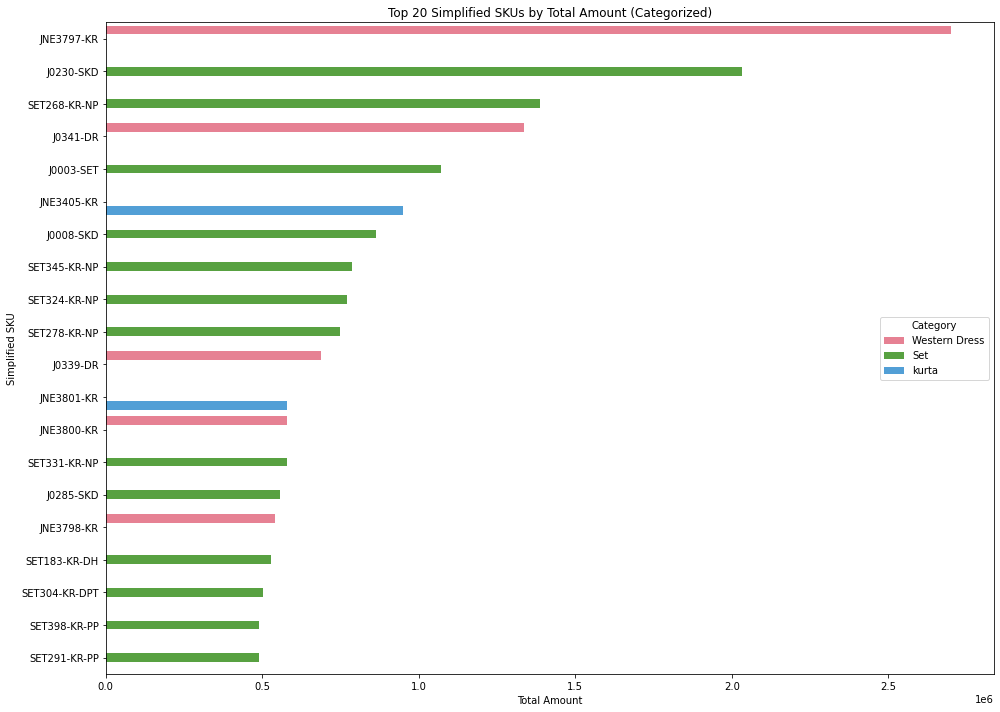

In [8]:
#SEGMENTATION BEGIN

# Define broader categories
category_mapping = {
    'Set': 'Accessories',
    'kurta': 'Ethnic Wear',
    'Western Dress': 'Western Wear',
    'Top': 'Western Wear',
    'Ethnic Dress': 'Ethnic Wear',
    'Bottom': 'Accessories',
    'Saree': 'Ethnic Wear',
    'Blouse': 'Accessories',
    'Dupatta': 'Ethnic Wear'
}

# Plot 9: Total Sales by Segment
sales['Segment'] = sales['Category'].map(category_mapping)
# Calculate total sales by segment
segment_sales = sales.groupby('Segment')['Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Total Sales by Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualizations/Total_Sales_by_Segment.png')
plt.show()

# Plot 10: Top 20 Simplified SKUs by Total Amount (Categorized)
sku_amounts = sales.groupby(['Simplified_SKU', 'Category'])['Amount'].sum().reset_index(name='Total_Amount')
top_20_skus = sku_amounts.nlargest(20, 'Total_Amount')
palette = sns.color_palette("husl", len(top_20_skus['Category'].unique()))

plt.figure(figsize=(14, 10))
sns.barplot(x='Total_Amount', y='Simplified_SKU', hue='Category', data=top_20_skus, palette=palette)
plt.title('Top 20 Simplified SKUs by Total Amount (Categorized)')
plt.xlabel('Total Amount')
plt.ylabel('Simplified SKU')
plt.legend(title='Category', loc='right')
plt.tight_layout()
plt.savefig('../visualizations/Top_20_Simplified_SKUs_By_Total_Amount.png')
plt.show()





